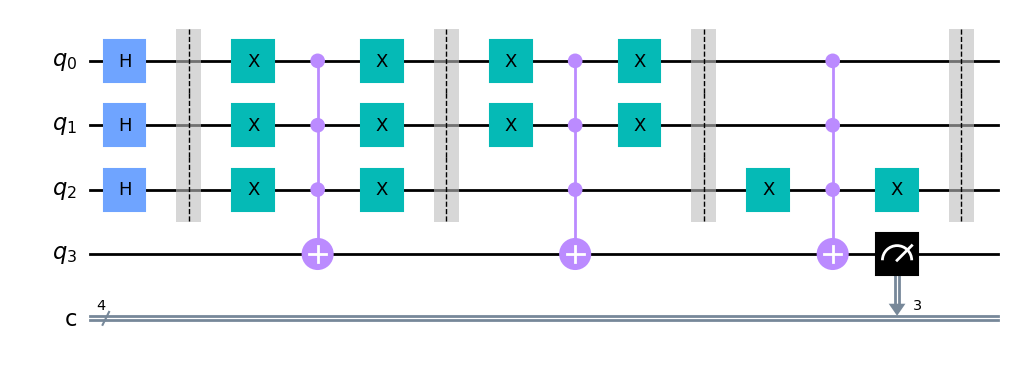

In [3]:
import numpy as np
from qiskit import BasicAer, QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute, transpile
from numpy import pi
from qiskit.circuit.library import C3XGate
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere




qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[2])
circuit.x(qreg_q[1])
circuit.append(C3XGate(), [qreg_q[1], qreg_q[0], qreg_q[2], qreg_q[3]])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.append(C3XGate(), [qreg_q[1], qreg_q[0], qreg_q[2], qreg_q[3]])
circuit.x(qreg_q[1])
circuit.x(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.x(qreg_q[2])
circuit.append(C3XGate(), [qreg_q[1], qreg_q[0], qreg_q[2], qreg_q[3]])
circuit.x(qreg_q[2])
circuit.measure(qreg_q[3], creg_c[3])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

circuit.draw(output='mpl')

{'0000': 636, '1000': 364}


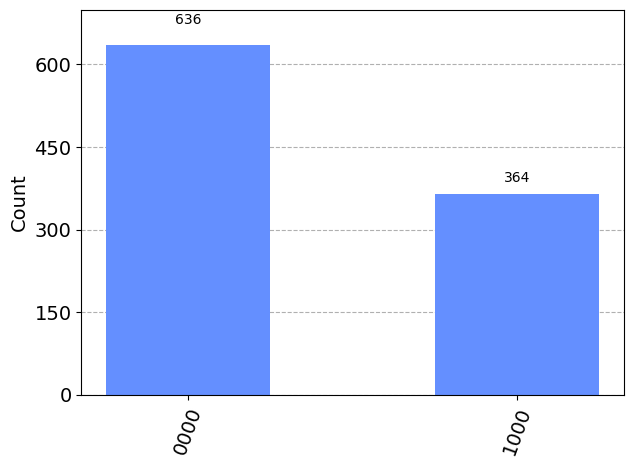

In [4]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print(counts)
circuit.draw('mpl')
plot_histogram(counts)